Part I 

Step 1

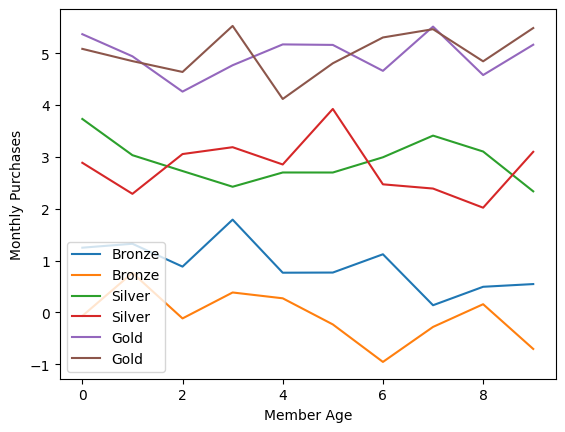

In [48]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
N=10
X0= np.random.randn(N,2)* 0.5 + np.array([1,0])
y0= np.zeros(N,dtype=int)
X1= np.random.randn(N,2)* 0.5 + np.array([3,3])
y1= np.ones(N,dtype=int)
X2= np.random.randn(N,2)* 0.5 + np.array([5,5])
y2= np.full(N,2,dtype=int)
plt.plot(X0,label="Bronze")
plt.plot(X1,label="Silver")
plt.plot(X2,label="Gold")
plt.xlabel("Member Age")
plt.ylabel("Monthly Purchases")
plt.legend()
plt.show()

Step 2

In [49]:
X=np.vstack((X0,X1,X2))
y=np.concatenate((y0,y1,y2))
indices =np.arange(X.shape[0])
np.random.shuffle(indices)
X=X[indices]
y=y[indices]
split_idx=int(0.8*len(X))
X_train,X_test= X[:split_idx],X[:split_idx]
y_train,y_test= y[:split_idx],y[:split_idx]
num_classes=3

def to_one_hot(labels,num_classes):
    return np.eye(num_classes)[labels]
y_train=to_one_hot(y_train,num_classes)
y_test=to_one_hot(y_test,num_classes)
def init_parameters(input_dim=2, hidden_dim=4, output_dim=3):
    np.random.seed(seed=42)
 
    # Weights and biases for hidden layer
    W1 = 0.01*np.random.randn(input_dim, hidden_dim) 
    b1 = np.zeros((1, hidden_dim))
 
    # Weights and biases for output layer
    W2 = 0.01*np.random.randn(hidden_dim, output_dim) 
    b2 = np.zeros((1, output_dim))
 
    return W1, b1, W2, b2
W1,b1,W2,b2= init_parameters(input_dim=2,hidden_dim=4,output_dim=3)
print ("The first two rows of X_train",X_train)
print ("The first two rows of X_test",X_test)
print ("Weights 1",W1)
print ("Weights 2",W2)




The first two rows of X_train [[ 4.94217586  4.84944815]
 [ 5.36923329  5.08568414]
 [ 0.49358444  0.15712367]
 [ 1.78960641  0.38371736]
 [ 0.76829115 -0.23286488]
 [ 5.16563172  5.48777256]
 [ 2.72780864  3.05546129]
 [ 5.51549976  5.46564006]
 [ 3.73282438  2.88711185]
 [ 1.12098114 -0.95664012]
 [ 0.54598796 -0.70615185]
 [ 2.99325139  2.47114454]
 [ 3.1044318   2.02016494]
 [ 3.41127246  2.38957818]
 [ 2.42450321  3.18784901]
 [ 2.69968066  2.85415313]
 [ 5.17180914  4.11847992]
 [ 2.33590698  3.09843062]
 [ 4.58039124  4.84539381]
 [ 5.16204198  4.80745886]
 [ 0.13754108 -0.28114376]
 [ 3.0337641   2.28762591]
 [ 0.88292331 -0.11706848]
 [ 0.76526281  0.27128002]]
The first two rows of X_test [[ 4.94217586  4.84944815]
 [ 5.36923329  5.08568414]
 [ 0.49358444  0.15712367]
 [ 1.78960641  0.38371736]
 [ 0.76829115 -0.23286488]
 [ 5.16563172  5.48777256]
 [ 2.72780864  3.05546129]
 [ 5.51549976  5.46564006]
 [ 3.73282438  2.88711185]
 [ 1.12098114 -0.95664012]
 [ 0.54598796 -0.70615

Step 3

In [50]:
def relu(z):
    return np.maximum(0, z)
 
def relu_deriv(z):
    return(z > 0).astype(float)
    
 
def softmax(z):
    shifted = z - np.max(z, axis=1, keepdims=True)
    exp_vals = np.exp(shifted)
    return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

def forward_pass(X, W1, b1, W2, b2):
    # 1. Hidden layer
    z1 = X.dot(W1) + b1     
    A1 = relu(z1)           
 
    # 2. Output layer
    z2 = A1.dot(W2) + b2   
    probs = softmax(z2)     
 
    return z1, A1, z2, probs

def cross_entropy_loss(probs, targets):
    eps = 1e-12
    return -np.mean(np.sum(targets * np.log(probs + eps),axis=1))
z1,A1,z2,probs=forward_pass(X_train[:2],W1,b1,W2,b2)
loss=cross_entropy_loss(probs,y_train[:2])
print("z1 value: ",z1)
print("A1 value: ",A1)
print("z2 value: ",z2)
print("probs value: ",probs)
print("loss: ",loss)

z1 value:  [[ 0.01319334 -0.01818762  0.10859301  0.11248716]
 [ 0.01476144 -0.0193312   0.11508968  0.12080433]]
A1 value:  [[0.01319334 0.         0.10859301 0.11248716]
 [0.01476144 0.         0.11508968 0.12080433]]
z2 value:  [[-0.00158159 -0.00156043 -0.00274966]
 [-0.00167488 -0.00166398 -0.0029402 ]]
probs value:  [[0.33346074 0.3334678  0.33307146]
 [0.33347268 0.33347632 0.333051  ]]
loss:  1.0994289284318544


Step 4.2

In [51]:
 
def backward_pass(X, Y, z1, A1, z2, probs, W1, W2, ):

    N = X.shape[0]

    dz2 = (probs - Y)  / N
 

    dW2 = A1.T.dot(dz2) / N  
    db2 = np.sum(dz2, axis=0, keepdims=True) / N
 
    # --- Backprop into hidden layer ---
    dA1 = dz2.dot(W2.T)             
    dz1 = dA1 * relu_deriv(z1)  
   
    dW1 = X.T.dot(dz1) / N
    db1 = np.sum(dz1, axis=0, keepdims=True) / N
 
    return dW1, db1, dW2, db2
 
 
 

In [52]:

def train_mnist(
    x_train, y_train,
    x_test, y_test,
    hidden_dim=4,
    epochs=1000,
    N=10,
    learning_rate=0.1
):
    # 1. Initialize parameters
    W1, b1, W2, b2 = init_parameters(
        input_dim=2,hidden_dim=4,output_dim=3
    )
 
    num_samples = x_train.shape[0]
    num_batches = num_samples // N
 
    for epoch in range(epochs):
        
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]
 
        # Mini-batch training
        for i in range(num_batches):
            start = i * N
            end   = start + N
            X_batch = x_train[start:end]
            y_batch = y_train[start:end]
 
            # Forward pass
            z1, a1, z2, probs = forward_pass(X_batch, W1, b1, W2, b2)
 
            # Compute loss (optional for logging)
            loss = cross_entropy_loss(probs, y_batch)
 
            # Backward pass
            dW1, db1, dW2, db2 = backward_pass(
                X_batch, y_batch,
                z1, a1, z2, probs,
                W1, b1, W2, b2
            )
 
            # Update parameters
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
 
            if i % 100 == 0:
                print(f"Epoch {epoch+1}, Batch {i}, Loss: {loss:.4f}")

 
    return W1, b1, W2, b2, loss
 

Step 6

In [53]:
def accuracy(x_train, y_train,
    x_test, y_test):
    _, _, _, train_probs = forward_pass(x_train, W1, b1, W2, b2)
    train_loss = cross_entropy_loss(train_probs, y_train)
    train_acc  = accuracy(train_probs, y_train)
 
    _, _, _, test_probs = forward_pass(x_test, W1, b1, W2, b2)
    test_loss = cross_entropy_loss(test_probs, y_test)
    test_acc  = accuracy(test_probs, y_test)
 
    print(f"\n[Epoch {epoch+1} Summary]")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f}, Test  Acc: {test_acc:.4f}\n")

Step 6.2